# Python Crash Course 

## Lecture 4: SImple Data Analysis and Machine Learning

In the final lecture of the Python Crash Course, we will introduce some common methods and techniques that you will likely use in your project involving simple data analysis. This aims at providing the readers some basic direction how to carry out simple cleaning of the data (here simple process means that the dataset is intact and does not require extensive refinement or polishing before they can be applied for analysis) and feed into the machine learning pipline. .

However, a strong caveat should be noted here. To be fully prepared for the data science and machine learning, one is strongly suggested to be familiar with the following libraries. Given the very limited time for our crash course, we will not be able to get into detailed, or even slight touch, into these libraries. In this lecture, we will only show you what they are doing and why we are doing this. But we avoid touch the parameters and treat these functions as-is. We remind that a poorly processed dataset is very often untrainable, because it lacks the data structure and mathematical properties which is suitable for the individual algorithms. 

The required libraries contain the following:
- [**Pandas**](https://pandas.pydata.org/): Library for handling spreadsheet like data.
- [**Numpy**](https://numpy.org/): Library for processing matrix-like structures.
- [**Scipy**](https://scipy.org/): Library for simple numerical methods and regression tools.
- [**Scikit-learn**](https://scikit-learn.org/stable/): Library for basic (non-GPU) machine learning tools。
- [**Matplotlib**](https://matplotlib.org/index.html): Library for visualizing the data and output.

The examples here aim at showing you the simple principal in the general procedure in how to use machine learning, and what preparation are necessary. When you explore in further depth in this direction, you will definitely want to know some basic syntaxes about these libraries in order to fully emerge into the machine learning society. <br>


## Data Regression 

When we are given a large set of data, typically, 2 dimension, we want to study if there are correlations between the two parameters. For example, how does the working people's salary increase or decrease their age. There are certainly tons of data available by different surveying company, but how do we parametrize those data, such that we can build a mathematical models to predict and to extract new insights or trends hidden from the data?

In this part, we will start with some simple 2D data, and show how to fit a data curve for these data. 

We will first import the libraries. Notice that in this Lecture, we have much more extensive use of external library because of the complexity in the coding and data analysis. Again, I emphasize that it is impossible for us to go through the details of each library. You are strongly encouraged to visit the documentation API page, or use the function `help` to study the detailed use of the function. 

It is also the reason for us to go into details about the basic infrastructure in coding. If you are not familiar with the basic framework in modern computation, you might be brute forcing or developing highly inefficient code, or lack the ability to search for errors from the code you write. Remember that AI can generate the code very easily. But without a solid foundation or experience in coding, it becomes impossible for you to pindown what has gone wrong. And hence, you cannot figure out. 

In programming there are three types of error.
1. **The syntax error**: By typing the wrong keyword, extra space, forgot to close the bracket. These errors the compiler can handle pretty easily. 
2. **The runtime error**: The code appears to be correct. But when you run the code, it crashes because of the wrong data format, division with zero, or missing files that lead to the crash of the code. This cannot be observed unless one examines the flow of the code and check for the cases in details. 
3. **The logic error**: The code does not encounter errors that lead to failed compilation or execution, instead it simply generates results that do not match what your code is supposed to work for. For example, you want to write a code to compute the average, but instead you used the statistical mean. In terms of syntax, there is nothing wrong. However, the results have nothing to do with what you intend to look for. 

We use the scipy `curve_fit` for our curve fitting demonstration, and a simplified architechture in Numpy.   

In [1]:
# import the necessary libraries for the regression analysis

import random as rnd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

First, we will build a pseudo dataset which we want to analyze. We include some random noise to mimic the real data set. 

In [3]:

rnd.seed(42)

# build the randomized dataset with some underlying logic
# this creates the x-y relation which we will map
input_x = np.array([0.005*i for i in range(200)])
input_y = np.array([x*x - 0.9*x + 0.18 + 0.1*rnd.random() for x in input_x])

In [4]:
# check the data structure to see if they agree with each other 

print(input_x.shape)
print(input_y.shape)

(200,)
(200,)


**Quick check**: Do you remember where this `shape` comes from?

Always check the data structure to see if the data is the one you want. If the data structure looks fishy, very likely you are fetching the wrong data. And you will want to double check if you are getting the right source of data.

Then we will plot the data in a graph.

Text(0, 0.5, 'y')

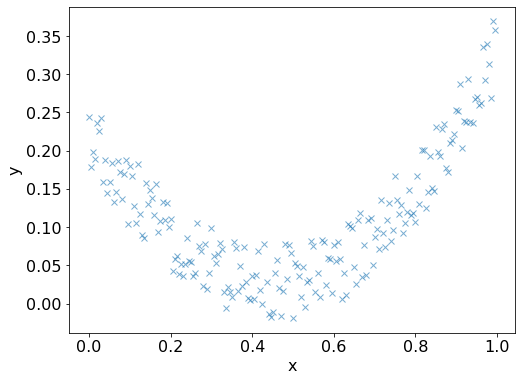

In [6]:
# plot the data set to visualize the data

plt.rcParams.update({"font.size":16})
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
ax.plot(input_x, input_y, "x", alpha=0.6)

ax.set_xlabel("x")
ax.set_ylabel("y")

For you who will be doing data analysis, visualizing the data is always encouraged because you are trying to provide informed judgement to speed up the process. In many cases, you will save a lot of time in selecting the correct machine learning algorithm. Remember that different algorithms have different strength and weakness, and we are exactly approaching this. 

For example, in this case, we see that while there are noises. The data can be viewed in a narrow band. So the noise does not dominate the data. Instead, there is a clear correlation between $x$ and $y$, plus some secondary noise. We want to model the correlation, not the noise. 

### Numpy Polyfit

We will use the `numpy.polyfit` to do a polynomial regression. 

In [7]:
# notice that coeffs gives the coefficients from the largest power of x

coeffs = np.polyfit(input_x, input_y, 2)
a1_fit, a2_fit, a3_fit = coeffs

In [8]:
print("coeffs shape = ", coeffs.shape)
print(coeffs)

coeffs shape =  (3,)
[ 0.98197667 -0.87801584  0.22344807]


We remind that the coefficients start from the highest power of x and then decreasing downwards.

We can further compare the regressed polynomial with the actual data. We use the `numpy.polynomial.Polynomial` to create a polynomial function, using the coefficient we derived in the last step. Notice that this `Polynomial` object requires coefficient from the **smallest** power of x.

In [10]:
# create a polynomial based on the fitting
# notice the order, Polynomial takes from the smallest power of x
polynomial = np.polynomial.Polynomial(coeffs[::-1])

# use the polynomial fitting to create the predicted curve
# with the same spacing of the input_x
x_curve = np.linspace(min(input_x), max(input_x), 100)
y_curve = polynomial(x_curve)

Text(0, 0.5, 'y')

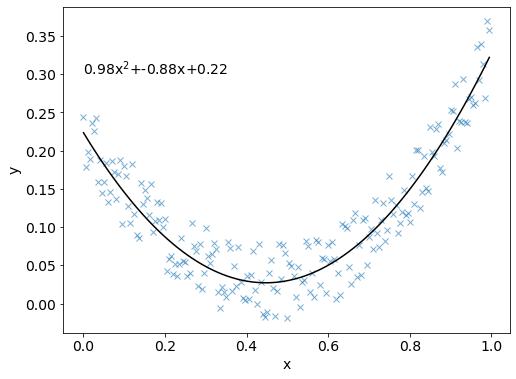

In [12]:
# Plot the data sets and the regressed polynomial relation

plt.rcParams.update({"font.size":14})
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
ax.plot(input_x, input_y, "x", alpha=0.6)
ax.plot(x_curve, y_curve, "k-", )
ax.annotate(r"{:4.2f}x$^2$+{:4.2f}x+{:4.2f}".format(a1_fit, a2_fit, a3_fit), (0.0,0.3))

ax.set_xlabel("x")
ax.set_ylabel("y")

One disadvantage of the `Polyfit` is that there is no measurement about the error. Remember, knowing the errors in data analysis is way more important than to fit the curve itself. It is because there are infinite ways for us to fit the data. But not all are equally good. We want to find the one that is closest to the reality, i.e., the most accurate and precise, without introducing spurious interpretation.

In view of that, we introduce the second regression method, the `scipy.curve_fit`

### Scipy Curve_fit

The Numpy has extensively adopted the subroutine of the Scipy library for operation related to matrices. Therefore we introduce the `Numpy Polyfit` first so that you gain a first experience, and now we look at the more comprehensive `Scipy curve_fit`. 

The `curve_fit` is more general that it allows you to fit in the function you need. This means, not only polynomial, but exponential function, logarithmic or trigonometric functions are available for the fitting. We can even combine these together for a general fitting, thus making your fitting more powerful.

To do so, we need to define the fitting function, and state the *coefficients* of the function. 

In [13]:
# define the fitting function, here we see that x is the 
# independent variables, and a1, a2, a3 are the coefficients
# to be fitted. 

def fitting_func(x, a1, a2, a3):
    """A quadratic function: y = a1*x**2 + a2*x + a3"""
    return a1 * x * x + a2 * x + a3

In [14]:
# use the curve_fit to fit the data points

popt, pcov = curve_fit(fitting_func, input_x, input_y)

The popt and pcov are the **opt**imized coefficient sets and the **cov**ariance matrix characterizing the error of your fitting. 

Then we can view the parameter explicitly by extracting the popt array. 

In [20]:
# print the type for demonstration
print(type(popt), '\n')

# note you can also directly access popt[0], popt[1], ...
a1_fit, a2_fit, a3_fit = popt

print('coefficient = ', a1_fit, a2_fit, a3_fit)
print(popt)

<class 'numpy.ndarray'> 

coefficient =  0.9819766719756081 -0.8780158418263523 0.223448067029686
[ 0.98197667 -0.87801584  0.22344807]


Now we also look at the covariance matrix. 

This tabulates the uncertainty of individual parameters to each of the fitting coefficients. 

In [17]:
print("The covariance matrix")
print(pcov)
print(" ")

perr = np.sqrt(np.diag(pcov))
print("Error: ", perr)
print("Relative error： ", perr/popt)

The covariance matrix
[[ 7.79652024e-04 -7.75753769e-04  1.27999372e-04]
 [-7.75753769e-04  8.23846609e-04 -1.53215249e-04]
 [ 1.27999372e-04 -1.53215249e-04  3.82084527e-05]]
 
Error:  [0.02792225 0.02870273 0.0061813 ]
Relative error：  [ 0.02843474 -0.03269044  0.02766325]


Notice that while the error of the constant is small, because the fitted value is also small, it corresponds to an error similar to the other terms. The relative error is a more precise characterization to the fitting because it does not depend on the absolute value of your fitting. However, if the fitted coefficient is zero, other methods should be used. 

In [21]:
# we can further cast the polynomial to the Polynomial 
# again notice the order of coefficients must match the format
# from the lowest order to the highest order of x
polynomial2 = np.polynomial.Polynomial(popt[::-1])

# use the polynomial fitting to create the curve
x_curve2 = np.linspace(min(input_x), max(input_x), 100)
y_curve2 = polynomial2(x_curve2)

Text(0, 0.5, 'y')

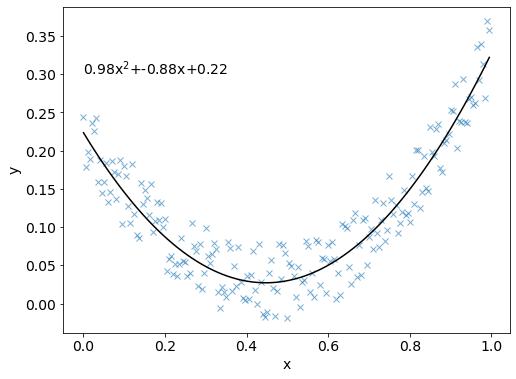

In [22]:
# our standard procedure in plotting a figure

plt.rcParams.update({"font.size":14})
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
ax.plot(input_x, input_y, "x", alpha=0.6)
ax.plot(x_curve2, y_curve2, "k-", )
ax.annotate(r"{:4.2f}x$^2$+{:4.2f}x+{:4.2f}".format(a1_fit, a2_fit, a3_fit), (0.0,0.3))

ax.set_xlabel("x")
ax.set_ylabel("y")

You might notice that the fitting are identical because we are using the same functionality twice, just that they are embedded in different libraries. But the error analysis in `curve_fit` allows us to compare consistently which fitting is the best. 

### Exercise 1

Now read the data using the box below. Use the curve-fit method to fit the data. What functions do you find?

To limit our choices, we will use three fittings:
1. $y(x) = b_1 x^2 + b_2 x + b_3$
2. $y(x) = c_1 x^3 + c_2 x^2 + c_3 x + c_4$
3. $y(x) = d_1 \exp(d_2 x + d_3)$

Copy the method from above and see which one gives the best fitting. 

In [ ]:
# Run this box first to set the data in test_x and test_y

array = np.loadtxt("regression_data.txt", delimiter=",")
test_x = array[:,0]
test_y = array[:,1]

In [ ]:
# visualize the data here 



In [ ]:
# define the fitting function
def fitting_func(x, a1, a2, a3):
    
    # edit the function below
    return a1 * x * x + a2 * x + a3

In [ ]:
# use the curve_fit to fit the data points

popt, pcov = curve_fit(fitting_func, test_x, test_y)

In [ ]:
# make the polynomial by yourself 


# generate the curve using the test_x


# plot the fitted curve and the data point



In [ ]:
# check the error 



## Classification

An important function for data analysis is to classified objects. By objects, we do not necessarily mean cat or dog. Sometimes the classification can be something more practical, whether a patient has certain illness, whether the client is potentially willing to invest, whether the house is going to be sold. Things that involve a decision or lead to discrete consequences, could be cast into a classification problem. 

In this section, we will examine two major types of classification to do a textbook standard problem of the classification, the identification of penguins. 

In Australia, three types of Penguins are observed. They have different beaker and flipper sizes distribution. It leads to a question, *if I measure only these quantities without seeing the actual penguin, could I tell which species of penguin it is?*


Here are the link </br>
- [Penguin classification](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png)
- [Penguin beaker size](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png)

Notice that this part is much more involved than the previous part as we are dealing with, now, no longer two-dimensional relation, but a high dimensional parameter space. Your abstract thinking, foundation in Python, and the algorithmic development we have practiced play important roles here to understand the procedure smoothly. 

We first import the libraries.

In [1]:
# import all the library at once

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import tree

In [24]:
# learn how to use svm

help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'id

In [2]:
# read the inout csv file which is provided in the package

penguins = pd.read_csv("penguins.csv")

In [26]:
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


Notice that the species are defined with the string names. This is good but not convenient, because Python does not recognize these textual names as direct as us. To help Python understand the type of penguin, it is often beneficial to code this categories by numbers. In this case

- Adelie = 0
- Chinstrap = 1
- Gentoo = 2

In [3]:
# changes the species column as category
penguins['species'] = penguins['species'].astype('category')

# map each category to a number and store it is "species_code"
penguins['species_code'] = penguins['species'].cat.codes

In [29]:
# now we print the end of the table, notice the new column

penguins.tail(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_code
337,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE,2
338,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE,2
339,Gentoo,Biscoe,50.4,15.7,222,5750,MALE,2
340,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE,2
341,Gentoo,Biscoe,49.9,16.1,213,5400,MALE,2


### General statistical analysis of the table

As we have repeatedly discussed, it is very important to examine the basic structure of the data, so that we do not brute-force or overly rely on the blind search for the best fitting. 

Here we check the schema of the table. These are the standard treatment of the Pandas object. As you might notice, Pandas is not a typical Python library. It was originally developed by the quantitative researchers for stock investment. It is developed to stremaline the extraction and manipulation of features in a spreadsheet like database. 

`Pandas` is very much involved language that I had written a full mini-textbook just to introduce how the language is to be used for extracting features from a dataframe object. If you are dedicated to data science, it will be important to master this library for efficient data cleaning and data management. 

In [30]:
# list all the columnes

penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'species_code'],
      dtype='object')

In [31]:
# data size

penguins.shape

(342, 8)

Reminder: The first number is the **row** number, the second number is the **column** number

In [32]:
# what kind of species exist
# this explains above why we choose three types

penguins["species"].unique()

['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

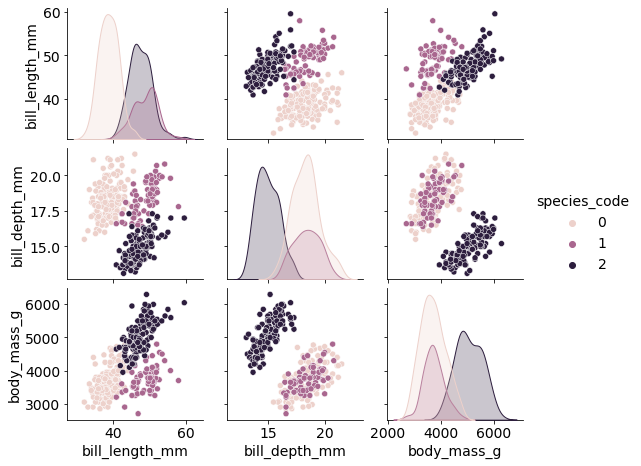

In [33]:
# plotting the data distribution by seaborn
# we choose only the numerical columns, because we do not want to complicate the 
# data cleaning process. Note that in real data, sometimes there are entries without 
# certain data points, how to process those require case-to-case experience. 

pairplot_figure = sns.pairplot(
    penguins[["bill_length_mm","bill_depth_mm", "body_mass_g","species_code"]], hue="species_code")
pairplot_figure.fig.set_size_inches(9, 6.5)

This pair plot from `seaborn` is very powerful. It shows from the parameter space if certain pairs are well disentagled. Of course, as we noted this is a classic textbook-level of example, the data has features that are clearly distinctive, and there are some which are not. 

By noticing the data above, think about that:
1. Which pair of data would be the best to distinguish the species? Why do you think that?
2. If you want to draw by hand how to do the classification, what criteria will you draw qualitatively?

These are important questions when you proceed to do the classfier training. 

### Classification by Supported Vector Machine



First of all, what is Support Vector Machine? Let us examine by a simple case. (Courtesy to Gemini for this short introduction)

[Picture of a Supported Vector Machine (SVM)](https://i0.wp.com/spotintelligence.com/wp-content/uploads/2024/05/support-vector-machine-svm.jpg?fit=1200%2C675&ssl=1)

Imagine you have a large table covered in mixed-up fruit: green apples and red oranges. Your goal is to draw a line on the table that perfectly separates the two groups. If someone hands you a new piece of fruit, you can simply look at which side of the line it falls on to "classify" it.

In the world of data science, a Support Vector Machine (SVM) is the tool we use to find that "best" possible line.

1. **Finding the "Widest Street"**

When we separate two groups, there are infinite lines we could draw. Some might be very close to the apples, while others might graze the oranges.

An SVM doesn't just look for any line; it looks for the widest street possible.
- **The Divider**: This is the line in the middle of the street.
- **The Gutters**: These are the boundaries that touch the items closest to the "enemy" camp.

The Support Vectors: The specific pieces of fruit that sit right on the gutter are called "Support Vectors." They are the most important points because they actually "support" or hold up the boundary. If you move them, the whole street moves.

2. **Moving Beyond the Line: The Hypersurface**

In simple examples, we use a 2D flat surface (like a table) and a 1D line. But real-world data is rarely that simple. Sometimes the "apples" and "oranges" are clustered in a way that no straight line can separate them—perhaps the apples are in a circle in the middle, and the oranges surround them.

To solve this, the SVM does a "magic trick":
- **Adding Dimensions**: It lifts the data into a higher space. Imagine tossing the fruit into the air. Suddenly, you might be able to slide a flat sheet of paper (a plane) between the apples and oranges while they are suspended at different heights.

The Hypersurface: When we deal with many different characteristics at once (like weight, color, texture, and sweetness), we aren't working on a flat table anymore. We are working in a "high-dimensional" space.
- In 2D, our separator is a line.
- In 3D, our separator is a flat plane.
In anything higher, we call that separator a Hyperplane (or more broadly, a Hypersurface).

Once we can find the plane that can the best separate the different categories (i.e., with the highest accuracy in the classification), we complete our tasks. 

Now having introduced the method, we now need to proceed the data analysis pipeline. It includes a few steps:
1. Create the training data and the testing data. The training data allows the machine learning to identify the pattern in your input data. The testing data will test how good your machine learning models are. THey should be independent so that the algorithm does not cheat. 
2. Preprocess the data (this applies to certain classes of algorithm)
3. Use the training data to build the classification model
4. Test the model to study its accuracy and its precision
5. Visualize the classification


In [34]:
#split the testing and training set

X_train, X_test, y_train, y_test = train_test_split(
    penguins[["bill_length_mm","bill_depth_mm"]],
    penguins["species_code"],
    test_size = 0.2,
    random_state = 42)

In [35]:
# build a Support Vector Machine classification

from sklearn import svm
clf = svm.SVC(kernel="poly")
clf.fit(X_train, y_train)

SVC(kernel='poly')

In [37]:
# now test the accuracy of the model

y_pred = clf.predict(X_test)

# print the standardized test results
accuracy_builtin = clf.score(X_test, y_test)
print(f"Accuracy using .score(): {accuracy_builtin:.2f}")

accuracy_manual = accuracy_score(y_test, y_pred)
print(f"Accuracy using accuracy_score: {accuracy_manual:.2f}")

# Using a classification report for detailed metrics (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy using .score(): 0.99
Accuracy using accuracy_score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



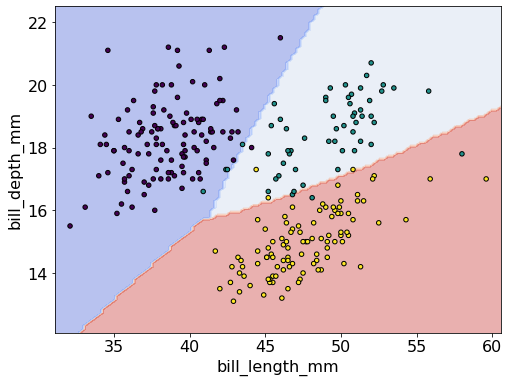

In [36]:
# visualize the data

plt.rcParams.update({"font.size":16})

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.4,
        ax=ax,
        xlabel="bill_length_mm",
        ylabel="bill_depth_mm",
)

ax.scatter(X_train["bill_length_mm"], X_train["bill_depth_mm"], c=y_train, s=20, edgecolors="k")

plt.show()

### Exercise 2

In this exercise repeat the classification but use other kernels. 
Which one are the best?

First task: Go to the [API page](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) to read what kind of kernels are available in SKLearn. 

Second task: Replace the kernel and do the training and testing again. See which one has the best accuracy, which one the lowest. Also see how the parameter space is split. You might need to jot down the numbers if you plna to reuse the script directly. Or you might copy the script and paste them below so that you can work indvidually. 

In [ ]:
## Create the svm object



In [ ]:
## Train the data



In [ ]:
## Test the data



In [ ]:
## Visualize the data



### Random Forest

Random Forest is the ensemble of a binary tree. Below we use the lovely Gemini to give us a short introduction.

To understand a **Random Forest**, we first have to understand a single **Decision Tree**.

Imagine you are trying to decide whether to go for a hike. You might ask a series of "Yes/No" questions: Is it raining? Is it too hot? Do I have my hiking boots? Each answer leads you down a branch until you reach a final decision. This is a Decision Tree.

A Random Forest is simply a collection of hundreds or thousands of these trees working together.

[Picture of a Random Forest](https://miro.medium.com/v2/resize:fit:1400/0*Ga2SY3cwKnkCRCTZ.jpg)

---

1. **The Power of the Crowd (Wisdom of the Multitude)**

A single decision tree can be "opinionated" or even a bit sensitive. If one small detail in your data changes, the whole tree might flip its decision. A Random Forest fixes this by using **Ensemble Learning**.

* Instead of one expert, you have a **forest of experts**.
* Each tree gets to vote on the classification (e.g., "Is this a bird or a plane?").
* The forest takes the **majority vote**. Even if a few trees get it wrong, the overall group usually lands on the right answer.

---

2. **How the "Hypersurface" Looks**

In the previous example with SVMs, we talked about a smooth "curtain" or "wall" (the hypersurface) separating data. Random Forest creates a very different kind of boundary. Because every decision in a tree is a "Yes/No" split based on a specific value (like "Is weight > 10 lbs?"), the boundaries it draws are always **perpendicular** to the axes of your data.

* **The "Staircase" Effect:** Instead of a smooth, curving line, a Random Forest creates a boundary that looks like a complex series of **boxes or steps**.
* **The Hypersurface:** Qualitatively, the "hypersurface" of a Random Forest is a **rugged, blocky landscape**. It carves the world into many little rectangular zones. Each zone belongs to a specific category.

> **Analogy:** If an SVM is like a flexible silk sheet draped over objects, a Random Forest is like a massive collection of LEGO bricks built up to wall off different areas.

---

3. **Why it’s "Random"**

The "Random" part of the name comes from two clever tricks used to make the trees diverse:

1. **Random Samples:** Each tree is trained on a different random subset of the data. It’s like giving ten students different chapters of a textbook and then asking them to take a test together.
2. **Random Features:** When a tree makes a split, it’s only allowed to look at a few random characteristics (like color or height) rather than everything at once. This prevents one single "strong" characteristic from dominating every single tree.

---

#### SVM vs. Random Forest: A Quick Comparison

| Feature | SVM (Support Vector Machine) | Random Forest |
| --- | --- | --- |
| **Boundary Shape** | Smooth, continuous curves or planes. | Blocky, "staircase" or box-like steps. |
| **Philosophy** | "Find the widest gap between groups." | "Combine many simple votes into one." |
| **Best Used For** | Clear separations in complex spaces. | Messy data with lots of "Yes/No" rules. |

Having introduced the random forest, now we proceed to classify the data. We will need to do a similar 4 steps:
1. Create the training data and testing data (this time we allow more variables to demonstrate the features)
2. Build the random forest object (RF) and train the classifier
3. Test the RF object and study its accuracy
4. Visualize the tree and feature importance

We intend to use more features to show its capability in handling multi-dimensional data. 

In [4]:
# Step 1: Create the training data and testing data

X_train, X_test, y_train, y_test = train_test_split(
    penguins[["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]],
    penguins["species_code"],
    test_size = 0.2,
    random_state = 42)

In [5]:
# Step 2: Build the random forest object (RF) and train the classifier

rf_clf = RandomForestClassifier(n_estimators=20)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [6]:
# Step 3: Test the RF object and study its accuracy

y_pred = rf_clf.predict(X_test)

# use the inherent score
accuracy_builtin = rf_clf.score(X_test, y_test)
print(f"Accuracy using .score(): {accuracy_builtin:.2f}")

# use the external score calculator
accuracy_manual = accuracy_score(y_test, y_pred)
print(f"Accuracy using accuracy_score: {accuracy_manual:.2f}")

# Using a classification report for detailed metrics (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy using .score(): 0.97
Accuracy using accuracy_score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.86      1.00      0.92        12
           2       1.00      1.00      1.00        22

    accuracy                           0.97        69
   macro avg       0.95      0.98      0.96        69
weighted avg       0.98      0.97      0.97        69



At this point I believe that it becomes clear that when it comes to training the machine learning algorithm. The procedure is very standardized. There is nothing fancy about that. All the procedure is pretty standarzied. However, what is non-trivial is 
1. How you clean the data so that it can be trained;
2. How you verify the accuracy of the training model;
3. If the accuracy in step 2 is low, how you improve the approach by selecting better algorithms or using more/less features;
4. How you interpret the classification results;
5. What new insight about the systems you have studied.

Below, for Random Forest we have another way to visualize the results. One way is to plot some of the tree out. This gives us some ideas how the train makes its decision. This also gives you some ideas how the data is distributed. 

[Text(0.5769230769230769, 0.875, 'flipper_length_mm <= 207.5\ngini = 0.651\nsamples = 188\nvalue = [115, 66, 92]'),
 Text(0.3076923076923077, 0.625, 'bill_length_mm <= 42.2\ngini = 0.462\nsamples = 121\nvalue = [114, 59, 2]'),
 Text(0.15384615384615385, 0.375, 'bill_depth_mm <= 16.65\ngini = 0.034\nsamples = 79\nvalue = [112, 2, 0]'),
 Text(0.07692307692307693, 0.125, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.125, '\n  (...)  \n'),
 Text(0.46153846153846156, 0.375, 'bill_depth_mm <= 15.45\ngini = 0.125\nsamples = 42\nvalue = [2, 57, 2]'),
 Text(0.38461538461538464, 0.125, '\n  (...)  \n'),
 Text(0.5384615384615384, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.625, 'flipper_length_mm <= 212.5\ngini = 0.151\nsamples = 67\nvalue = [1, 7, 90]'),
 Text(0.7692307692307693, 0.375, 'bill_depth_mm <= 16.4\ngini = 0.416\nsamples = 21\nvalue = [1, 7, 21]'),
 Text(0.6923076923076923, 0.125, '\n  (...)  \n'),
 Text(0.8461538461538461, 0.125, '\n  (...)  \n'),
 Text(0.9230769230769231, 

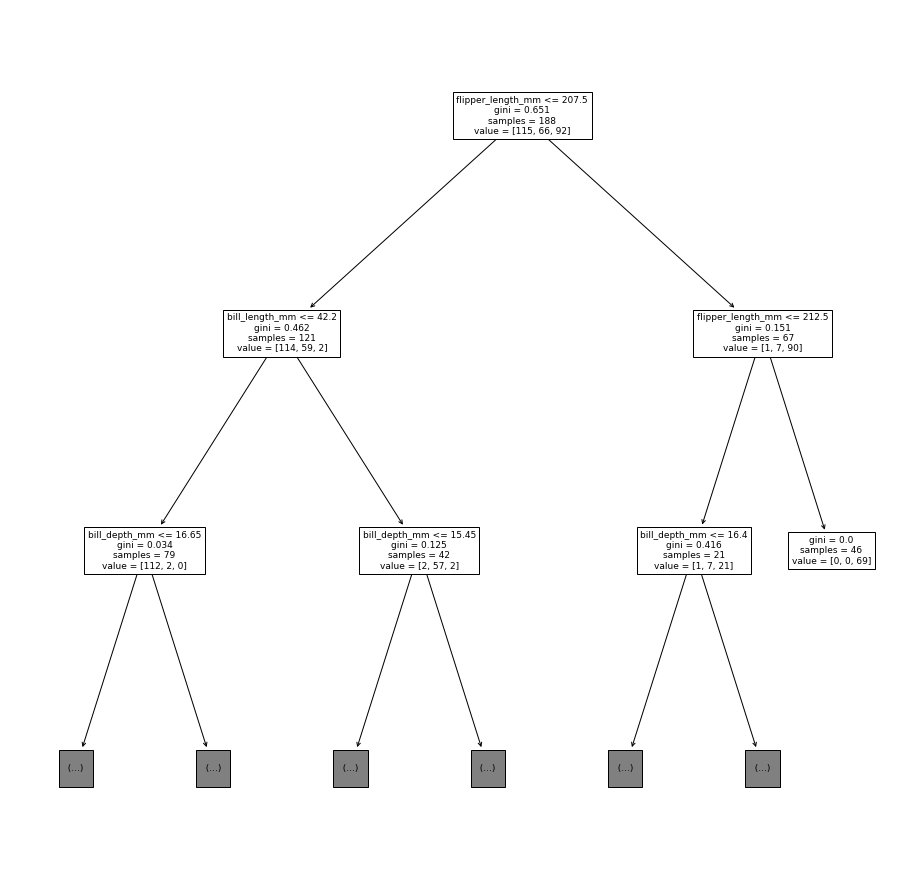

In [7]:
# Step 4a: Visualize one of the tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16))
tree.plot_tree(rf_clf.estimators_[0],  # we are picking the first tree
               feature_names = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"], 
               filled = False,
               max_depth=2)
#fig.savefig('rf_individualtree.png')

Notice that when the ensemble becomes pure (see the second level right most cell), it will stop classifying. Because it has completed its goal to classify. 

Then we compare the four features to see which one is more important. 

Text(0.5, 0, 'Relative Importance')

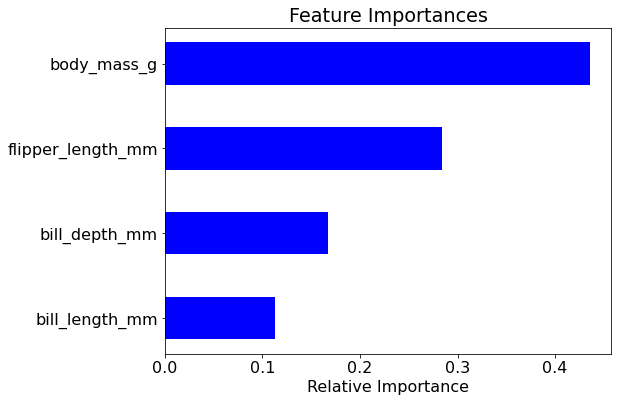

In [8]:
# Step 4b: Visualize the feature importance

plt.rcParams.update({"font.size":16})

# get importances from RF
importances = rf_clf.feature_importances_

# then sort them descending
indices = np.argsort(importances)

# get the features from the original data set
features = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# plot them with a horizontal bar chart
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))

ax.set_title('Feature Importances')
ax.barh([0,1,2,3], importances[indices], height=0.5, color='b', align='center')
ax.set_yticks([0,1,2,3],labels=features)
ax.set_xlabel('Relative Importance')

### Exercise 3

Now it is your turn. Copy (try type by yourself at least once so that you have a chance to question yourself what these scripts stand for) and experiment with different numbers of voter (trees) and try different maximum level in the tree. You need to search for the correct parameters. How few voters will you start to notice a loss of accuracy?

In [ ]:
## Step 1: Build the training and testing data



In [ ]:
## Step 2: Build a RF classifier and train it
## Remember to experiment with different model parameters



In [ ]:
## Step 3: Test your results and check the accuracy



In [ ]:
## Step 4: Visualize your results



### Classification using Artifical Neural Network (ANN)

Now we enter the last part of today's lecture. We shall look at one of the hot topics about machine learning: The neural network. Again we invite Gemini to give a simple introduction. )

[Picture of neural network](https://www.ibm.com/content/adobe-cms/us/en/think/topics/neural-networks/jcr:content/root/table_of_contents/body-article-8/image_456123789.coreimg.png/1763387287174/iclh-diagram-batch-01-03-deepneuralnetwork.png)

To explain an **Artificial Neural Network (ANN)**, we can look at it through two lenses: the "Biological Brain" analogy and the "Master Artist" analogy. While an SVM finds the widest street and a Random Forest builds blocky LEGO walls, a Neural Network acts like a sheet of super-flexible digital "clay."

---

1. **The Multi-Layer Filter (The "Expert Panel")**

Think of a Neural Network as a series of rooms. You pass a piece of data (like a photo of a cat) into the first room, and it goes through a journey:

* **The Input Layer:** The first room just looks at raw pixels—light and dark spots.
* **The Hidden Layers:** These are where the magic happens. The first hidden room might only look for simple **edges**. It passes its findings to the next room, which combines those edges to find **shapes** (like circles or triangles). The next room combines those shapes to find **features** (like ears or whiskers).
* **The Output Layer:** The final room looks at all the combined "clues" and makes a final guess: "That's a cat!"

---

2. **The Hypersurface: A Flexible Silk Sheet**

Qualitatively, the "hypersurface" of a Neural Network is the most sophisticated of the three.

* **Infinite Flexibility:** Because each "neuron" adds a little bit of curvature, a Neural Network doesn't have to be a straight line (SVM) or a boxy step (Random Forest).
* **The "Warped" Surface:** Imagine a flat silk sheet laid over a bed. A Neural Network can warp, stretch, and fold that sheet into almost any shape imaginable to wrap around complex clusters of data.

> **Qualitative Takeaway:** If the data groups are tangled together like two different colors of yarn in a messy ball, a Neural Network is the only tool "soft" and "flexible" enough to weave between the strands to separate them.

---

3. **How it Learns: The "Hot or Cold" Game**

Neural Networks learn through a process called **Backpropagation**.

1. The network makes a guess (e.g., "That's a dog").
2. You tell it: "Wrong, it was a cat."
3. The network then goes **backward** through all its rooms, whispering to every neuron: *"Hey, you were a little too confident about that ear shape; dial it back next time."* It does this millions of times until the "weights" (the importance it gives to each clue) are perfectly tuned.

---

#### Final Comparison: The Three Classifiers

| Model | Boundary Style | Best Analogy |
| --- | --- | --- |
| **SVM** | The Widest Street | A rigid, heavy-duty divider. |
| **Random Forest** | The LEGO City | A blocky, "Yes/No" collection of walls. |
| **Neural Network** | The Silk Sheet | A highly flexible, flowing surface that can mold to anything. |

Now I assume you are more familiar with the concept of the machine learning. We will proceed to use the ANN to classify the penguin. We will need to complete in 5 steps.

1. Build the training and testing data
2. **(New)** Normalize the data
3. Build the ANN and train the data
4. Study the accuracy of the ANN
5. Visualize the results

In [9]:
# Step 1: Build the training and testing data

X_train, X_test, y_train, y_test = train_test_split(
    penguins[["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]],
    penguins["species_code"],
    test_size = 0.2,
    random_state = 42)

Step 2 is new. For neural network, in order for the ANN to converge, it is important to scale the data between (0,1) (i.e., we normalize the data). Or otherwise the data could easily blow up, or leading to bias over certain cells. However, there are many ways to normalize the data (linear, polynomial, exponential, logarithmic...). This depends on the data distribution. This resonates with what we discuss at the beginning. Visualizing the data is important for us to make the correct (rational) decision. 

In [10]:
## Step 2: Normalize the results 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
## Step 3: Build the ANN and training the model

mlp = MLPClassifier(
    hidden_layer_sizes=(6,6),
    max_iter = 1000,
    random_state = 42)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(6, 6), max_iter=1000, random_state=42)

In [14]:
## Step 4: Test the ANN and read the accuracy report

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}% \n")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n",cm)

Accuracy: 98.55% 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        22

    accuracy                           0.99        69
   macro avg       0.97      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Confusion matrix: 
 [[34  1  0]
 [ 0 12  0]
 [ 0  0 22]]


Text(0.5, 1.0, 'Confusion Matrix')

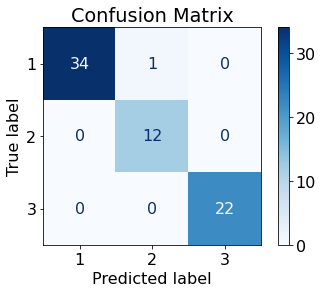

In [15]:
## Step 5a: Visualize the confusion matrix

disp = ConfusionMatrixDisplay.from_estimator(
    mlp,
    X_test,
    y_test,
    display_labels=[1,2,3],
    cmap=plt.cm.Blues,
    normalize=None,
)

disp.ax_.set_title("Confusion Matrix")

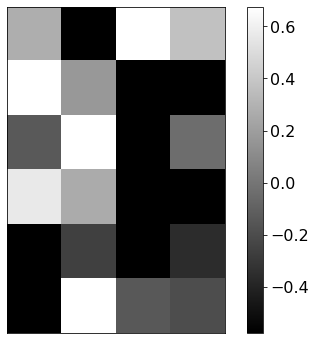

In [16]:
## visualize the weights
## Here we visualize the weight between the input layer and the first hidden layer

vmin0, vmax0 = mlp.coefs_[0].min(), mlp.coefs_[0].max()

fig, ax = plt.subplots(1, 1, figsize=(8,6))

cb0 = ax.matshow(mlp.coefs_[0].T, cmap=plt.cm.gray, vmin=0.5 * vmin0, vmax=0.5 * vmax0)
ax.set_xticks(())
ax.set_yticks(())
cbar0 = fig.colorbar(cb0, ax=ax)

plt.show()

### Exercise 4

Now repeat the procedure by try with different numbers of neural in the hidden layer. How does it affect the accuracy? Think about that:

1. Is it good to have infinite amount of neurons?
2. Is it good to have too few neurons?
3. What if you do not normalize the data?

In [17]:
## Step 1: Build the training and testing data



In [18]:
## Step 2: Normalize the data 



In [19]:
## Step 3: Build the ANN classifier and train it



In [20]:
## Step 4: Test the ANN classifier and study its accuracy



<h2 style="text-align: center;"> That's the end of this lecture. Thanks for reading all the way up here! :-) </h2>

